In [1]:
import pandas as pd
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import StringIO

/home/awinlab/anaconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


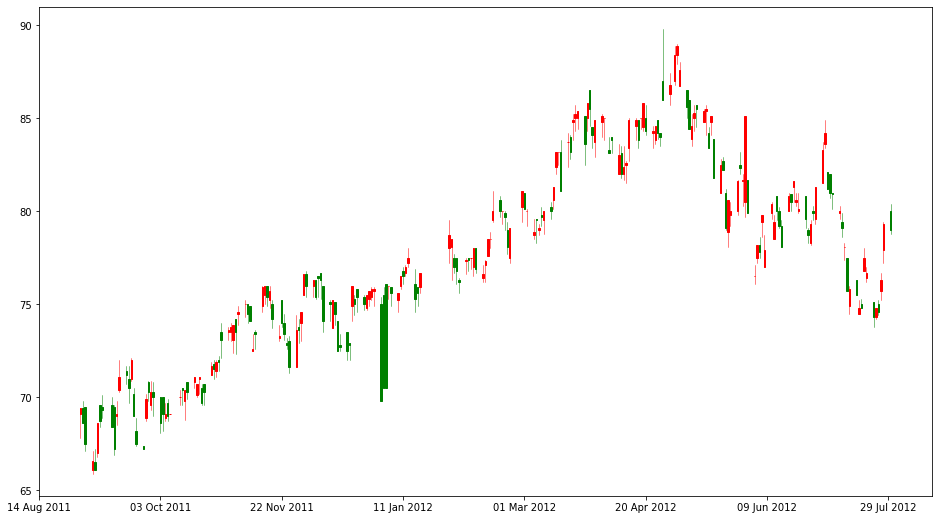

In [25]:
def get_stock_price(target_index, start_timestamp, end_timestamp):
    yfinance_url = "https://query1.finance.yahoo.com/v7/finance/download/{}?period1={}&period2={}&interval=1d&events=history&includeAdjustedClose=true"
    response = requests.get(yfinance_url.format(target_index, start_timestamp, end_timestamp), headers={'User-agent': 'Mozilla/5.0'})
    df = pd.read_csv(StringIO(response.text))
    date = df['Date']
    df['Date'] = pd.to_datetime(df['Date'])
    #df['Date'] = pd.to_datetime(df.index)
    df['Date'] = df['Date'].apply(mpl_dates.date2num)
    df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
    return df

def plot_all(df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='red', 
    colordown='green', alpha=1)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  fig.show()

target_index = "2330.TW"
start_date = "2011/8/31" 
end_date = "2012/7/31"
start_timestamp = str(int(datetime.strptime(start_date, "%Y/%m/%d").timestamp()))
end_timestamp = str(int(datetime.strptime(end_date, "%Y/%m/%d").timestamp()))

df = get_stock_price(target_index, start_timestamp, end_timestamp)
plot_all(df)

[(2, 70.099998), (5, 70.5), (6, 72.199997), (10, 66.199997), (12, 65.699997), (16, 68.099998), (33, 68.0), (38, 69.099998), (43, 73.0), (46, 76.099998), (47, 74.400002), (49, 74.099998), (52, 74.599998), (58, 73.300003), (60, 73.800003), (65, 76.099998), (70, 73.900002), (72, 77.400002), (77, 76.300003), (80, 71.599998), (82, 70.400002), (86, 72.400002), (88, 71.5), (96, 68.5), (100, 71.400002), (102, 73.900002), (104, 71.300003), (111, 62.200001), (113, 64.0)]


/home/awinlab/anaconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


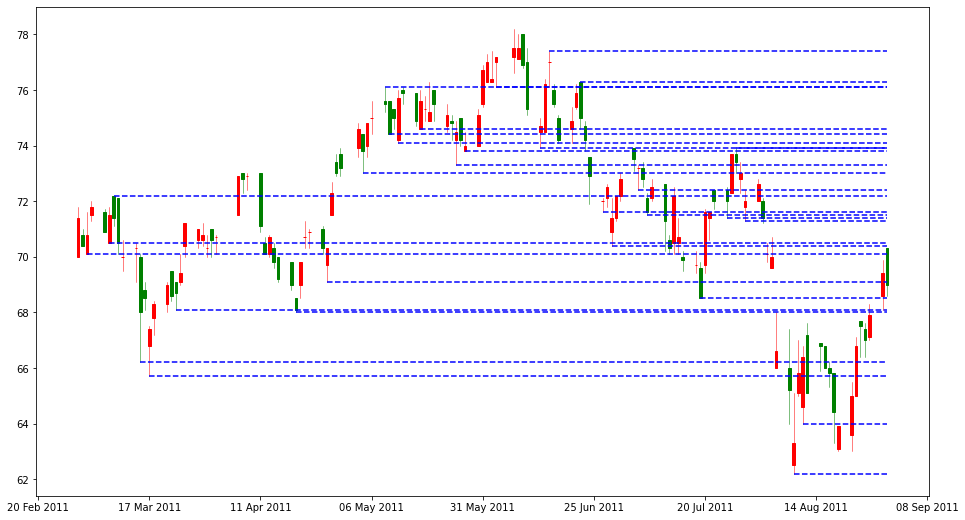

In [21]:
# method 1: fractal candlestick pattern

# determine bullish fractal 
def is_support(df, i):  
    cond1 = df['Low'][i] < df['Low'][i-1]   
    cond2 = df['Low'][i] < df['Low'][i+1]   
    #cond3 = df['Low'][i+1] < df['Low'][i+2]   
    #cond4 = df['Low'][i-1] < df['Low'][i-2]  
    return (cond1 and cond2) 

# determine bearish fractal
def is_resistance(df, i):  
    cond1 = df['High'][i] > df['High'][i-1]   
    cond2 = df['High'][i] > df['High'][i+1]   
    cond3 = df['High'][i+1] > df['High'][i+2]   
    cond4 = df['High'][i-1] > df['High'][i-2]  
    return (cond1 and cond2 and cond3 and cond4)

def is_localmin(df, i):
    cond1 = df['Close'][i] < df['Close'][i-1]
    cond2 = df['Close'][i] < df['Close'][i+1]
    cond3 = df['Close'][i+1] < df['Close'][i+2]   
    cond4 = df['Close'][i-1] < df['Close'][i-2]
    return (cond1 and cond2 and cond3 and cond4)

def is_localmax(df, i):
    cond1 = df['Close'][i] > df['Close'][i-1]   
    cond2 = df['Close'][i] > df['Close'][i+1]
    cond3 = df['Close'][i+1] > df['Close'][i+2]   
    cond4 = df['Close'][i-1] > df['Close'][i-2]
    return (cond1 and cond2 and cond3 and cond4)

# to make sure the new level area does not exist already
def is_far_from_level(value, levels, df):    
    ave =  np.mean(df['High'] - df['Low'])    
    return np.sum([abs(value-level)<ave for _,level in levels])==0

# for visualization
def plot_all(levels, df):    
  fig, ax = plt.subplots(figsize=(16, 9))   
  candlestick_ohlc(ax,df.values,width=0.6, colorup='red', 
    colordown='green', alpha=1)    
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)    
  for level in levels:        
    plt.hlines(level[1], xmin = df['Date'][level[0]], xmax = 
      max(df['Date']), colors='blue', linestyle='--')    
  fig.show()

levels = []
for i in range(2, df.shape[0] - 2):  
  if is_support(df, i):    
    low = df['Low'][i]
    #if is_far_from_level(low, levels, df):      
    levels.append((i, low))  
  elif is_resistance(df, i):    
    high = df['High'][i]    
    #if is_far_from_level(high, levels, df):      
    levels.append((i, high))

print(levels)
plot_all(levels, df)

/home/awinlab/anaconda3/envs/stock/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


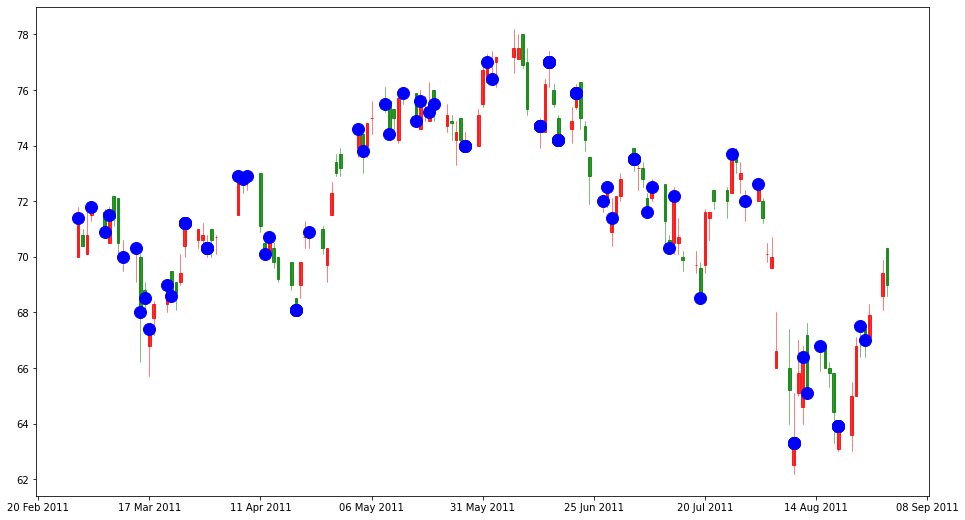

In [17]:
import pprint as pp

def plot2(df, buy_list, sell_list):    
    fig, ax = plt.subplots(figsize=(16, 9))   
    candlestick_ohlc(ax,df.values,width=0.6, colorup='red', colordown='green', alpha=0.8)    
    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    for buy in buy_list:
        plt.plot(df['Date'][buy[0]], buy[1], 'bo', markersize='12')
    
    for sell in sell_list:
        plt.plot(df['Date'][sell[0]], sell[1], 'bo', markersize='12')
    
    fig.show()

def get_min_loc(price_list):
    smallest = 99999
    for i in range(len(price_list)):
        if price_list[i] < smallest:
            smallest = price_list[i]
    
    return price_list.index(smallest)

def get_max_loc(price_list):
    largest = -99999
    for i in range(len(price_list)):
        if price_list[i] > largest:
            largest = price_list[i]
    
    return price_list.index(largest)


df = get_stock_price(target_index, start_timestamp, end_timestamp)

raw_trajectory_list = []
# 先判斷是否為局部最高和最低價（當日收盤價，是否均比前一天和後一天還高/低）
for i in range(2, df.shape[0] - 2):
    if is_localmin(df, i):
        raw_trajectory_list.append(['buy', i, df['Close'][i], 1])
        buy_list.append([i, df['Close'][i]])
        #print(i, "buy at", df['Close'][i])
    elif is_localmax(df, i):
        raw_trajectory_list.append(['sell', i, df['Close'][i], 1])
        sell_list.append([i, df['Close'][i]])
        #print(i, "sell at", df['Close'][i])

plot2(df, buy_list, sell_list)    



#final_trajectory_list = []

#for key in buy_sell_group.keys():
#    if buy_sell_group[key] >= 0.05:
#        final_trajectory_list.append([key[0], key[1], buy_sell_group[key]])
    
#pp.pprint(final_trajectory_list)

#buy_list = []
#sell_list = []
#for i in range(len(final_trajectory_list)):
#    buy_list.append([final_trajectory_list[i][0], df['Close'][final_trajectory_list[i][0]]])
#    sell_list.append([final_trajectory_list[i][1], df['Close'][final_trajectory_list[i][1]]])

#plot2(df, buy_list, sell_list)

#profit = 0
#invest_trajectory = []


/home/awinlab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


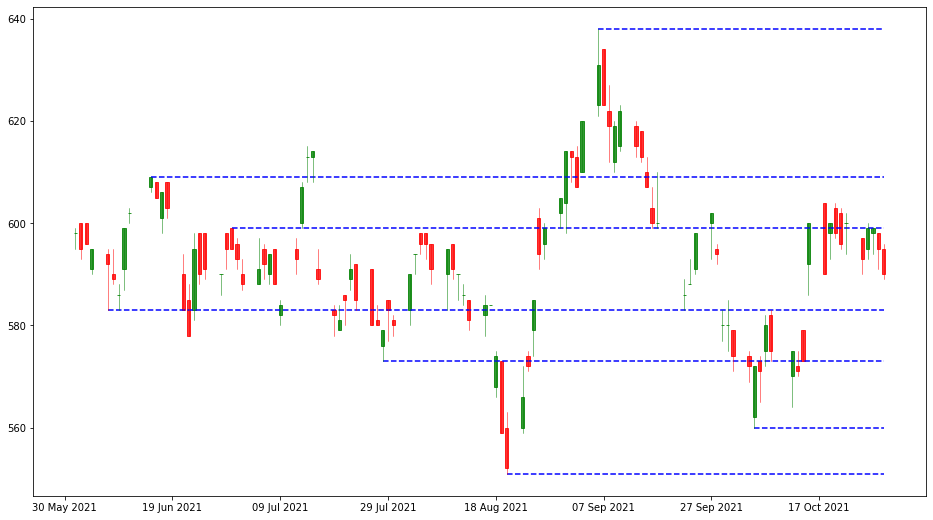

In [42]:
pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # taking a window of 9 candles
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # if we find a new maximum value, empty the max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # if the maximum value remains the same after shifting 5 times
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
plot_all(pivots, df)

TypeError: unsupported operand type(s) for -: 'str' and 'float'

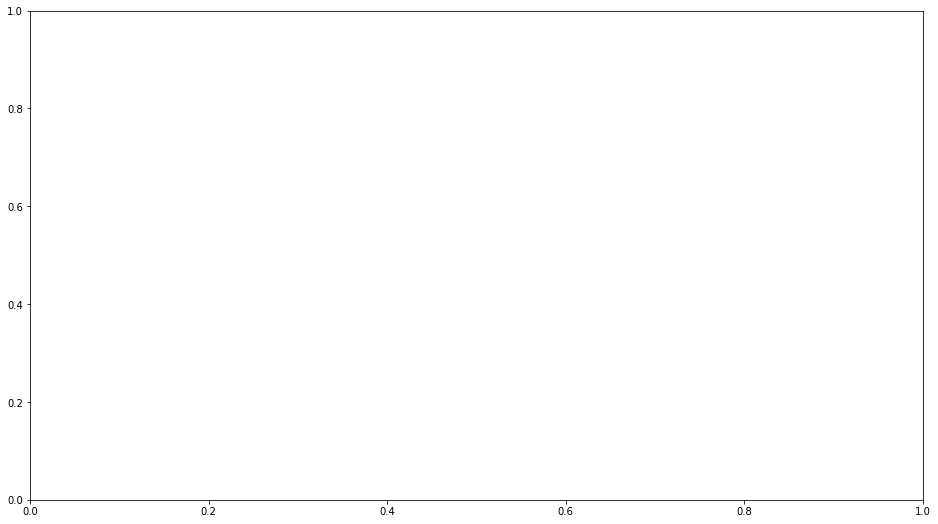